# Multi Feature Linear Regression - Housing Dataset

Our housing dataset will contain two input features in `X_train`:
- Size in Square Feet
- \# of Bedrooms

The output target in `y_train` will be **price**

# Objective

Create a Linear Regression Model with two input features

# Imports

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Dataset

In [22]:
def load_data():
    data = np.loadtxt("../data/02_house_price_prediction_training.txt", delimiter=",", dtype="int")
    X = data[:,:2] # Select all rows, only first two columns (Sqft, # of Bedrooms)
    y = data[:,2] # Select all rows, only target (price)
    return X, y

In [27]:
X_train, y_train = load_data()

### Inspect Dataset

#### **X_train**:

In [30]:
print(f"{x_train.shape}")
print("First 5 elements:\n", X_train[:5])

(47, 2)
First 5 elements:
 [[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]


#### **y_train**:

In [31]:
print("Shape of y_train", y_train.shape)
print("First five elements of y_train:\n", y_train[:5])

Shape of y_train (47,)
First five elements of y_train:
 [399900 329900 369000 232000 539900]


# Visualize Data

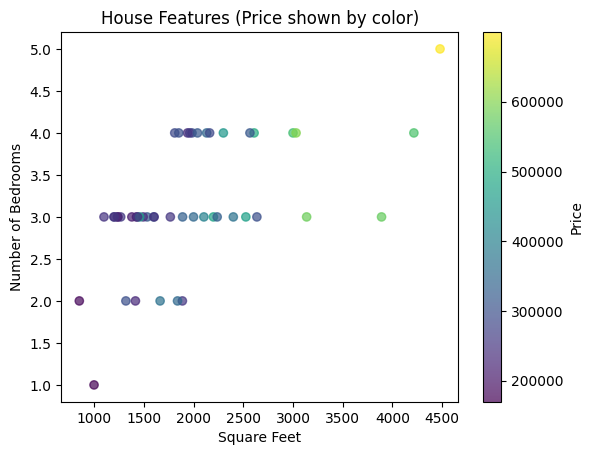

In [38]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Price')
plt.xlabel('Square Feet')
plt.ylabel('Number of Bedrooms')
plt.title('House Features (Price shown by color)')
plt.show()

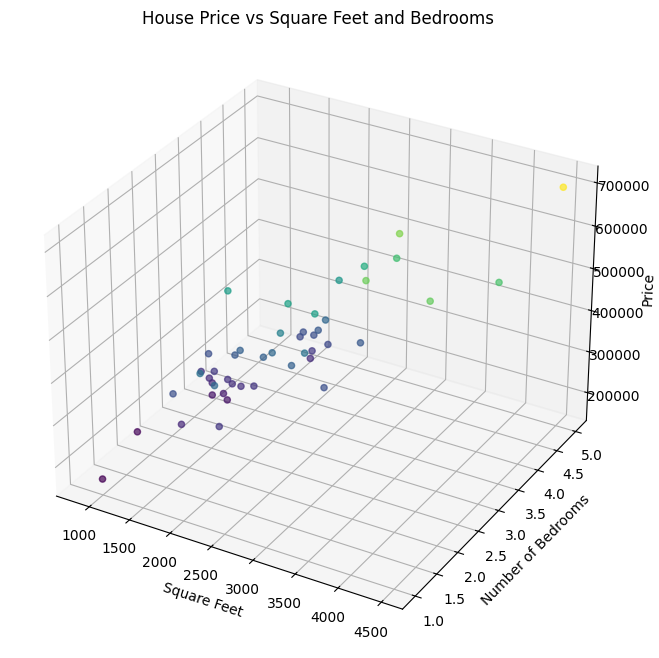

In [41]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create 3D scatter plot
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c=y_train, cmap='viridis', alpha=0.7)

ax.set_xlabel('Square Feet')
ax.set_ylabel('Number of Bedrooms') 
ax.set_zlabel('Price')
ax.set_title('House Price vs Square Feet and Bedrooms')
plt.show()

# Create Cost Function

In [48]:
def compute_cost(X, y, W, b):
    """
    Computes the cost function for linear regression.
    1/(2m) * Sum((yhat - y) ** 2) where yhat = (w_1 * x_1) + (w_2 * x_2) + b
    Args:
        X (ndarray): Shape (m,n) Input to the model (Sqft, # of Bedrooms)
        y (ndarray): Shape (m, ) Label (Actual Price)
        W (ndarray): Shape (n, ) Weight parameters of the model  
        b (scalar): Bias parameter of the model
    Returns:
        float: Average squared discrepancy between predictions and actual results
    """

    m = X.shape[0]
    total_cost = 0

    pred = np.dot(W, X) + b
    total_cost = np.sum((pred - y) ** 2)
    total_cost = total_cost / (2 * m)

    return total_cost
    

# Create Compute Gradient Function